## Классификация сервисов яндекс при помощи модели LigthGBM

In [1]:
import pandas as pd
import sys  
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

print("Pandas version: ", pd.__version__)
print("lightgbm version: ", lgb.__version__)

Pandas version:  1.4.4
lightgbm version:  4.1.0


In [2]:
current_path = ''


df_final_filename = f'data/df_final.csv'

dfFinal = pd.read_csv(df_final_filename)

print('df_final: ', dfFinal.shape)

df_final:  (4693, 40)


In [3]:
dfFinal.dropna(axis=1,inplace=True)

In [4]:
dfFinal.columns.to_list()

['proto',
 'packets_count',
 'f_pkts_num',
 'min_fiat',
 'min_biat',
 'flow_packets_per_second',
 'f_min_pkt_size',
 'b_min_pkt_size',
 'diag_step_fiat',
 'diag_step_biat',
 'diag_steps',
 'tcp_syn_count',
 'tcp_ack_count',
 'tcp_rst_count',
 'tcp_fin_count',
 'tcp_urg_count',
 'tcp_retr_count',
 'pktiat_0',
 'pktiat_1',
 'pktiat_2',
 'pktiat_7',
 'pktiat_9',
 'pktlen_1',
 'pktlen_8',
 'type']

In [40]:
y = dfFinal['type']
drop_col = ['type','proto','diag_step_fiat','diag_step_biat','diag_steps', 'pktiat_0', 'pktiat_1', 'pktiat_2', 'pktiat_7', 'pktiat_9']
X  = dfFinal.drop(columns=drop_col)
X

,packets_count,f_pkts_num,min_fiat,min_biat,flow_packets_per_second,f_min_pkt_size,b_min_pkt_size,tcp_syn_count,tcp_ack_count,tcp_rst_count,tcp_fin_count,tcp_urg_count,tcp_retr_count,pktlen_1,pktlen_8
0,10,4,0.000018,0.000013,0,66,66,0,10,0,0,0,10,66,66
1,10,4,0.000691,0.000010,1,66,66,0,10,0,0,0,10,66,66
2,10,4,0.001067,0.000013,1,66,66,0,10,0,0,0,10,66,66
3,10,4,0.001791,0.000009,0,66,66,0,10,0,0,0,10,66,66
4,10,4,0.000975,0.000011,0,66,66,0,10,0,0,0,10,66,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,10,6,0.000724,0.000090,0,66,66,0,10,0,0,0,10,66,807
4689,10,4,0.001118,0.000036,0,66,66,0,10,0,0,0,10,66,706
4690,10,6,0.000354,0.000136,0,66,66,0,10,0,0,0,10,66,807
4691,10,6,0.000326,0.000036,0,66,66,0,10,0,0,0,10,66,810


#### Разобьем данные на подопытные и проверочные

In [6]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=42,
                                                        stratify=None)

In [7]:
X_train.columns.to_list()

['packets_count',
 'f_pkts_num',
 'min_fiat',
 'min_biat',
 'flow_packets_per_second',
 'f_min_pkt_size',
 'b_min_pkt_size',
 'tcp_syn_count',
 'tcp_ack_count',
 'tcp_rst_count',
 'tcp_fin_count',
 'tcp_urg_count',
 'tcp_retr_count',
 'pktlen_1',
 'pktlen_8']

## LightGBM

In [8]:
estimator = lgb.LGBMClassifier(objective='multiclass', 
                               boosting_type = 'gbdt', 
                               num_class = '3',
                               n_estimators = 1, 
                               num_trees = 1,
                               min_child_samples = 2,
                               class_weight = 'balanced')

##### ...со следующим набором гиперпараметров

In [9]:
parameters = {
    'max_depth': [3,4,5,6],
    'num_leaves': [10,20,30,40],
    'learning_rate': [0.2, 0.5, 0.7, 1],
    'feature_fraction': [0.3, 0.5, 0.7, 1]
}

In [10]:
grid_search = GridSearchCV(estimator, param_grid=parameters, scoring='accuracy', cv=3)

In [11]:
grid_search.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.3, colsampl

[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be 

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start trainin

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.3, colsampl

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=tr

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start trainin

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be 

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be 

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be 

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.5, colsampl

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is se

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points 

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 wi

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsampl

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 wi

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM]

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM]

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 wi

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start trainin

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Star

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM]

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Star

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored.

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM]

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] 

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] 

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

GridSearchCV(cv=3,
             estimator=LGBMClassifier(class_weight='balanced',
                                      min_child_samples=2, n_estimators=1,
                                      num_class='3', num_trees=1,
                                      objective='multiclass'),
             param_grid={'feature_fraction': [0.3, 0.5, 0.7, 1],
                         'learning_rate': [0.2, 0.5, 0.7, 1],
                         'max_depth': [3, 4, 5, 6],
                         'num_leaves': [10, 20, 30, 40]},
             scoring='accuracy')

In [12]:
grid_search.best_estimator_

LGBMClassifier(class_weight='balanced', feature_fraction=0.7, learning_rate=0.2,
               max_depth=6, min_child_samples=2, n_estimators=1, num_class='3',
               num_leaves=20, num_trees=1, objective='multiclass')

In [13]:
predictions_LGB = grid_search.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7


In [14]:
print(grid_search.score(X_test, y_test))

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
0.8366477272727273


Feature importances:


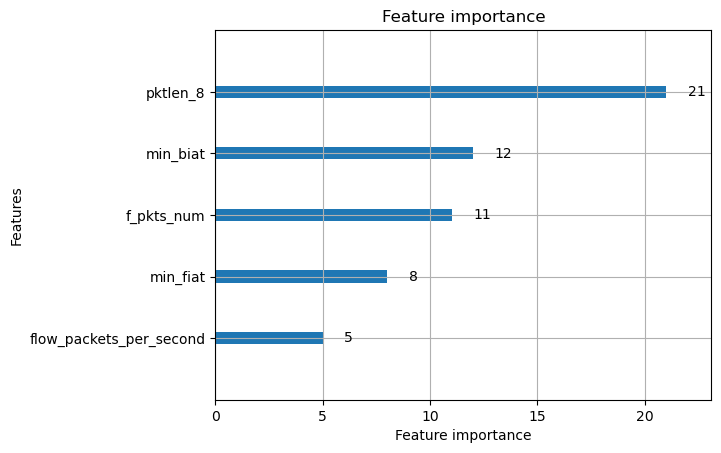


################################################################################
Confusion Matrix:


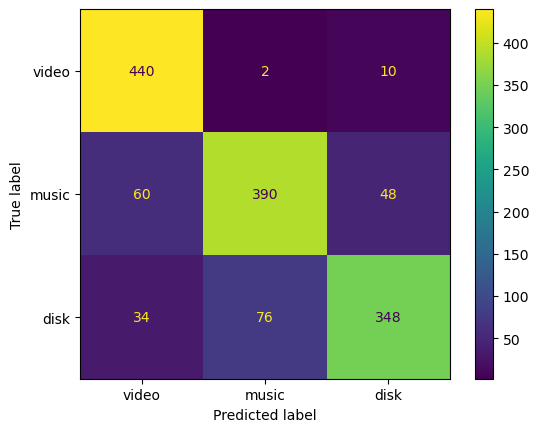


################################################################################
Classification Report:
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       452
           1       0.83      0.78      0.81       498
           2       0.86      0.76      0.81       458

    accuracy                           0.84      1408
   macro avg       0.84      0.84      0.84      1408
weighted avg       0.84      0.84      0.83      1408



In [15]:
feature_importances = np.zeros(X.shape[1])

print('Feature importances:')
lgb.plot_importance(grid_search.best_estimator_)
plt.show()

print('\n' + '#' * 80)
print('Confusion Matrix:')
    # functions.plot_confusion_matrix(valid_y, predictions_LGB.round(), "Analysis",
    #                                 index=["Std SSH", "Obf SSH"], columns=["Std SSH", "Obf SSH"])
    # metrics.confusion_matrix(model, valid_features, valid_y, cmap='Blues_r')
cm = confusion_matrix(y_test, predictions_LGB, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["video", "music", "disk"])
disp.plot() #cmap='Blues_r')
plt.show()
    
print('\n' + '#' * 80)
print('Classification Report:')
print(metrics.classification_report(y_test, grid_search.predict(X_test)))
plt.show()
    


In [16]:
# Make sure to average feature importances! 
feature_importances = grid_search.best_estimator_.feature_importances_ / 2
feature_importances = pd.DataFrame({'feature': list(X.columns),
                                    'importance': feature_importances}
                                  ).sort_values('importance', ascending = False)

feature_importances.head(10)

,feature,importance
14,pktlen_8,10.5
3,min_biat,6.0
1,f_pkts_num,5.5
2,min_fiat,4.0
4,flow_packets_per_second,2.5
0,packets_count,0.0
5,f_min_pkt_size,0.0
6,b_min_pkt_size,0.0
7,tcp_syn_count,0.0
8,tcp_ack_count,0.0


In [17]:
print(X_train.loc[1])
print(y_train.loc[1])

packets_count              10.000000
f_pkts_num                  4.000000
min_fiat                    0.000691
min_biat                    0.000010
flow_packets_per_second     1.000000
f_min_pkt_size             66.000000
b_min_pkt_size             66.000000
tcp_syn_count               0.000000
tcp_ack_count              10.000000
tcp_rst_count               0.000000
tcp_fin_count               0.000000
tcp_urg_count               0.000000
tcp_retr_count             10.000000
pktlen_1                   66.000000
pktlen_8                   66.000000
Name: 1, dtype: float64
1


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

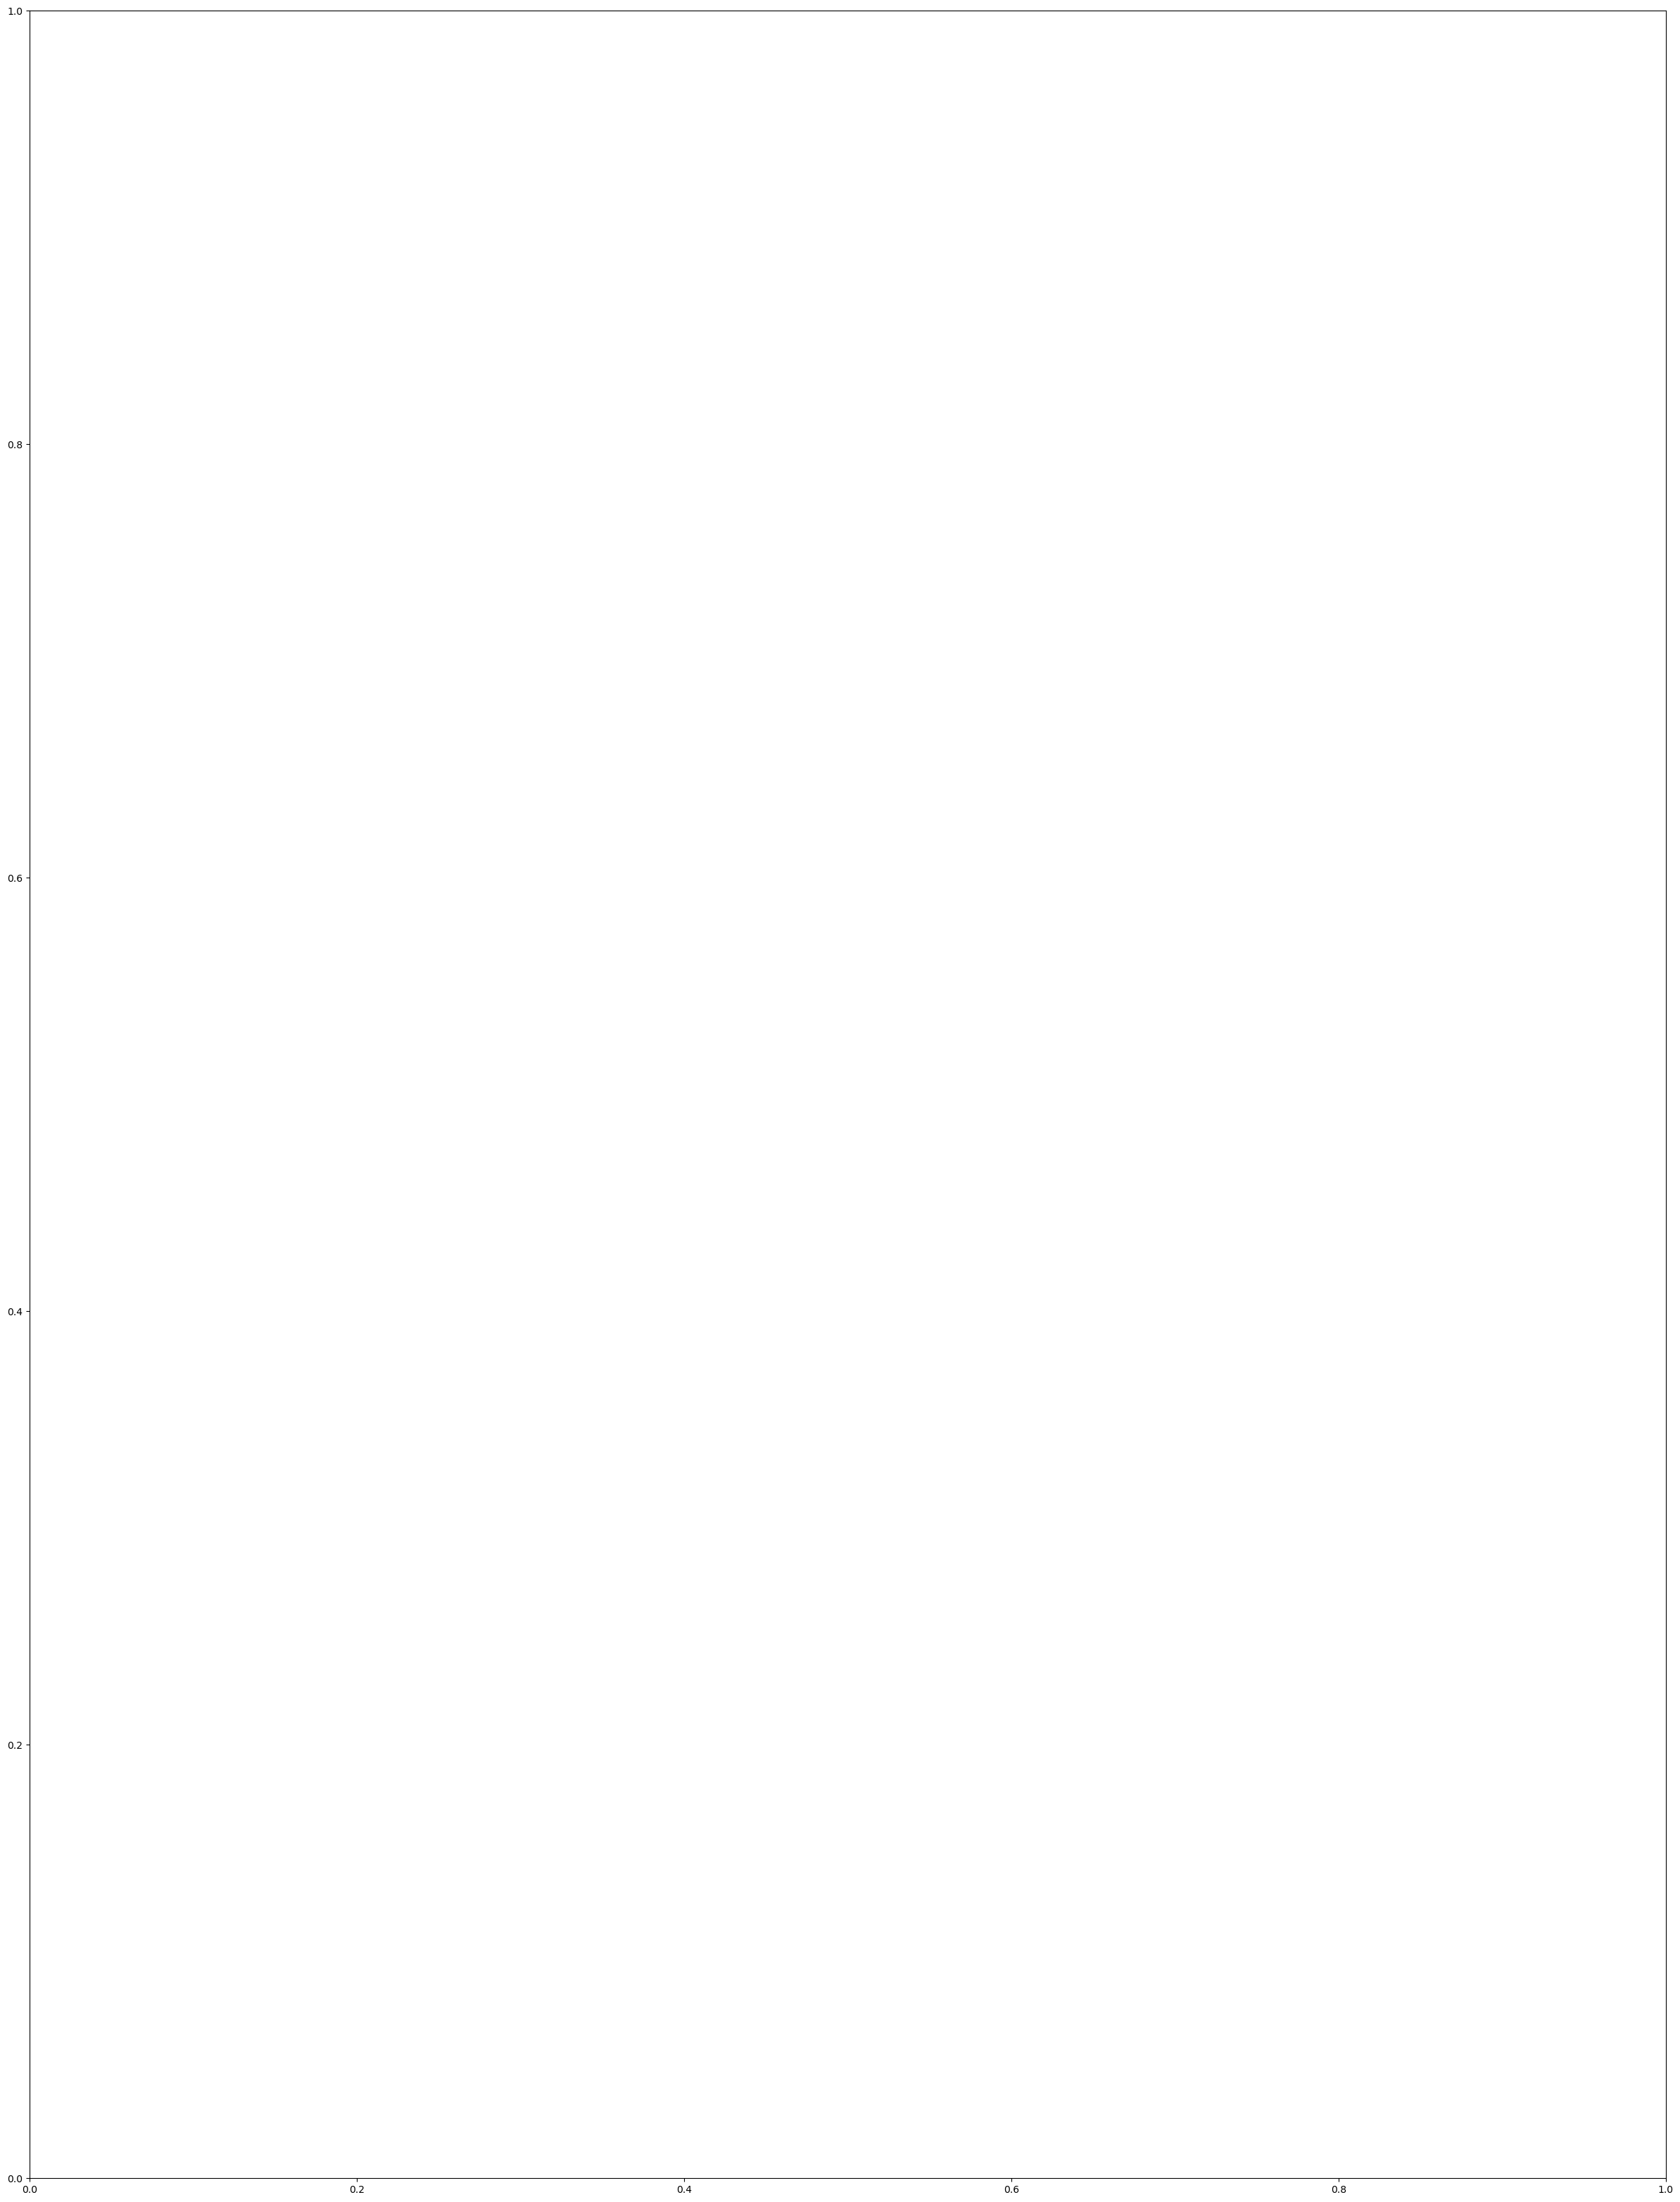

In [18]:
info = ['split_gain', 'internal_value', 'internal_count', 'internal_weight', 'leaf_count', 'leaf_weight', 'data_percentage']
lgb.plot_tree(grid_search.best_estimator_, tree_index=0, figsize=(30,40), show_info=info,example_case = X_train.loc[[1]])

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

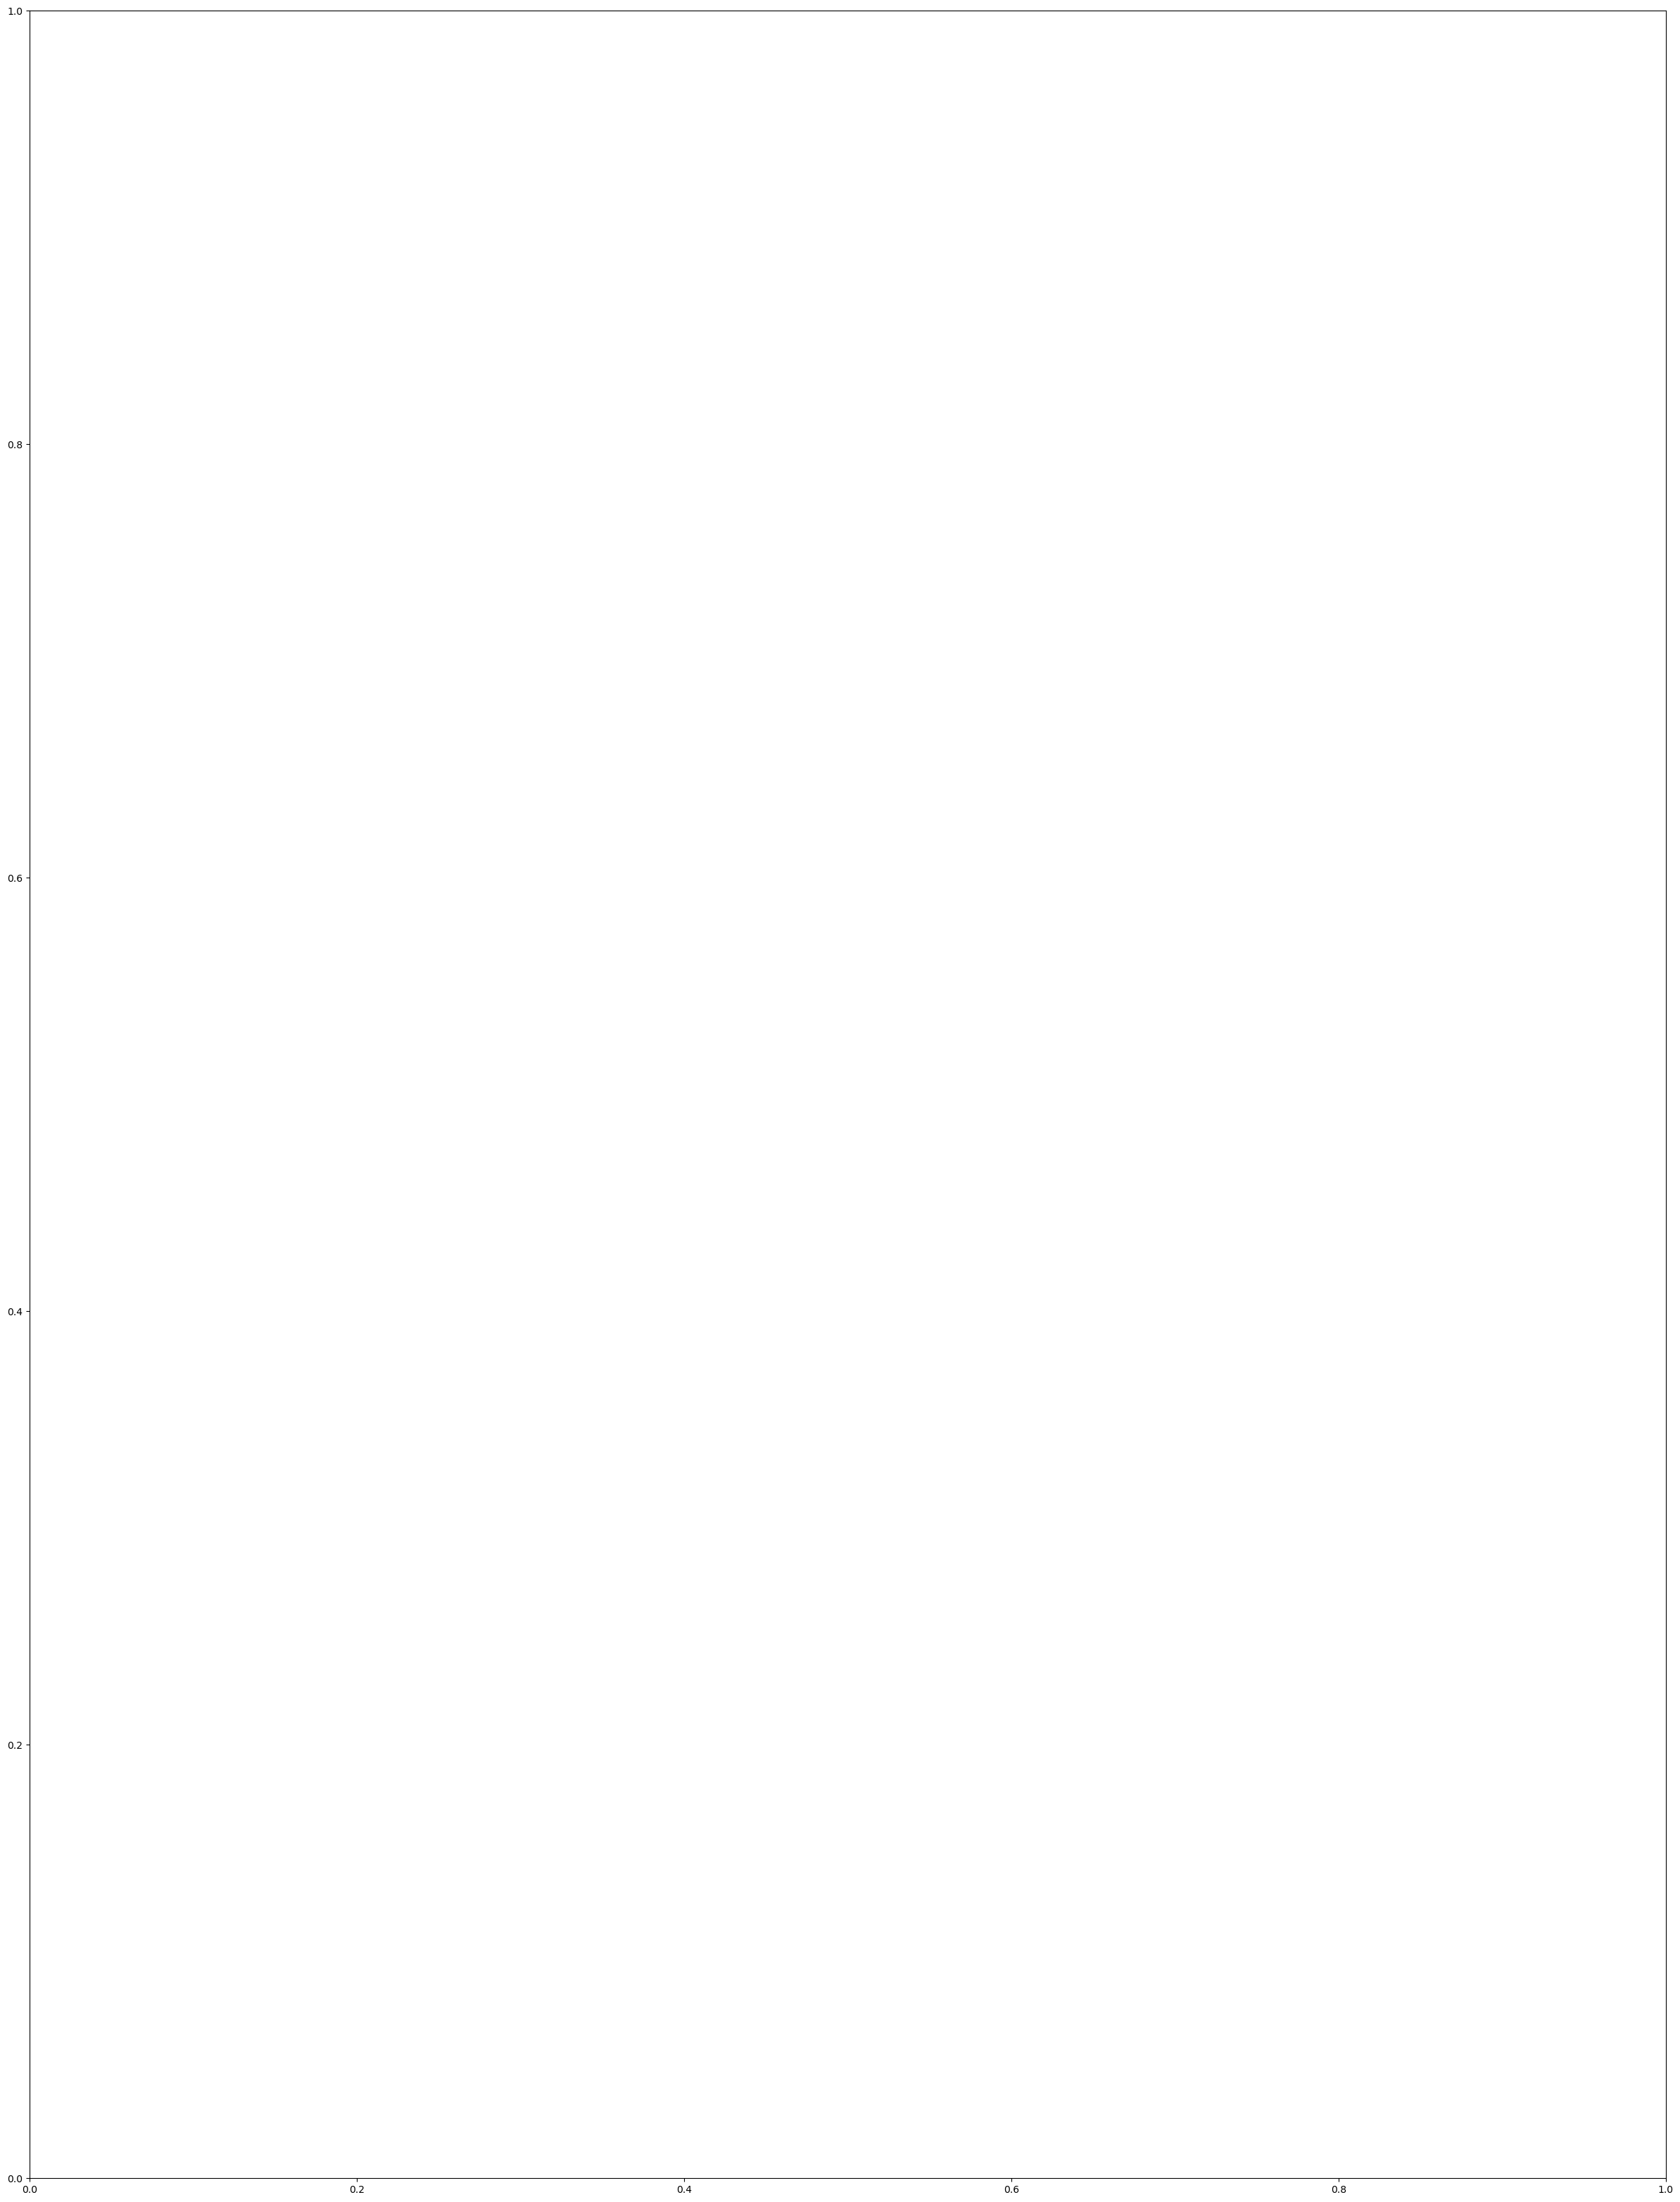

In [19]:

lgb.plot_tree(grid_search.best_estimator_, tree_index=1, figsize=(30,40), show_info=info,example_case = X_train.loc[[1]])


In [ ]:
lgb.plot_tree(grid_search.best_estimator_, tree_index=2, figsize=(30,40), show_info=info,example_case = X_train.loc[[1]])

In [20]:
tree_df = grid_search.best_estimator_.booster_.trees_to_dataframe()
print(tree_df.tree_index.max())
grid_search.best_estimator_.booster_.trees_to_dataframe()

2


,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S1,0-S2,None,pktlen_8,338.917999,7.200000e+01,<=,left,None,-1.098610,0.000000,3285
1,0,2,0-S1,0-S8,0-S4,0-S0,min_fiat,413.438995,2.914667e-04,<=,left,None,-0.972078,477.492000,1464
2,0,3,0-S8,0-S9,0-L9,0-S1,flow_packets_per_second,11.047900,1.000000e-35,<=,left,None,-1.179340,213.136000,633
3,0,4,0-S9,0-S16,0-S12,0-S8,f_pkts_num,8.970890,4.500000e+00,<=,left,None,-1.161960,186.023000,553
4,0,5,0-S16,0-L0,0-L17,0-S9,min_fiat,2.386390,1.943111e-05,<=,left,None,-1.241880,43.147700,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2,2,2-S4,2-L1,2-S18,2-S0,pktlen_8,76.445801,8.105000e+02,<=,left,None,-0.749690,113.390000,326
113,2,3,2-L1,None,None,2-S4,None,NaN,NaN,None,None,None,-0.698612,103.387559,296
114,2,3,2-S18,2-L5,2-L19,2-S4,pktlen_8,0.985983,1.420500e+03,<=,left,None,-1.277660,10.002100,30
115,2,4,2-L5,None,None,2-S18,None,NaN,NaN,None,None,None,-1.298612,9.000053,27


In [21]:
X_train.columns.to_list()

['packets_count',
 'f_pkts_num',
 'min_fiat',
 'min_biat',
 'flow_packets_per_second',
 'f_min_pkt_size',
 'b_min_pkt_size',
 'tcp_syn_count',
 'tcp_ack_count',
 'tcp_rst_count',
 'tcp_fin_count',
 'tcp_urg_count',
 'tcp_retr_count',
 'pktlen_1',
 'pktlen_8']

In [22]:
import joblib

joblib.dump(grid_search.best_estimator_, f'{current_path}/model_lightgbm.pkl')

PermissionError: [Errno 13] Permission denied: '/model_lightgbm.pkl'

In [23]:
from sklearn.feature_selection import RFE
model_for_rfe = grid_search.best_estimator_

rfe = RFE(model_for_rfe, n_features_to_select=4, step=1)
X_train_rfe = X_train
y_train_rfe = y_train
fit = rfe.fit(X_train_rfe,y_train_rfe)


C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 3285, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [24]:
print(("Число признаков: %d") %fit.n_features_)
print(("Отобранные признаки: %s") %fit.support_)
print(("Ранг признаков: %s") %fit.ranking_)

Число признаков: 4
Отобранные признаки: [False  True  True  True False False False False False False False False
 False False  True]
Ранг признаков: [12  1  1  1  2 11 10  9  8  7  6  5  4  3  1]


In [25]:
feature_names_rfe = fit.get_feature_names_out()
print(feature_names_rfe)

['f_pkts_num' 'min_fiat' 'min_biat' 'pktlen_8']


In [26]:
print(fit.score(X_test,y_test))

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
0.8416193181818182


In [27]:
dfFinal_new = dfFinal[feature_names_rfe]
y = dfFinal['type']

X  = dfFinal_new

#### Разобьем данные на подопытные и проверочные

In [28]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=42,
                                                        stratify=None)

In [29]:
X.shape

(4693, 4)

## LightGBM

In [30]:
estimator = lgb.LGBMClassifier(objective='multiclass', 
                               boosting_type = 'gbdt', 
                               num_class = '3',
                               n_estimators = 100, 
                               class_weight = 'balanced')

##### ...со следующим набором гиперпараметров

In [31]:
parameters = {
    'max_depth': [4],
    'num_leaves': [20],
    'min_child_samples': [19],
    'min_child_weight': [0.002],
    'feature_fraction': [0.6],
}

In [32]:
grid_search = GridSearchCV(estimator, param_grid=parameters, scoring='accuracy', cv=3)

In [33]:
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 535
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=3,
             estimator=LGBMClassifier(class_weight='balanced', num_class='3',
                                      objective='multiclass'),
             param_grid={'feature_fraction': [0.6], 'max_depth': [4],
                         'min_child_samples': [19], 'min_child_weight': [0.002],
                         'num_leaves': [20]},
             scoring='accuracy')

In [34]:
grid_search.best_estimator_

LGBMClassifier(class_weight='balanced', feature_fraction=0.6, max_depth=4,
               min_child_samples=19, min_child_weight=0.002, num_class='3',
               num_leaves=20, objective='multiclass')

In [35]:
predictions_LGB = grid_search.predict(X_test)
print(grid_search.score(X_test, y_test))

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
0.8721590909090909


Feature importances:


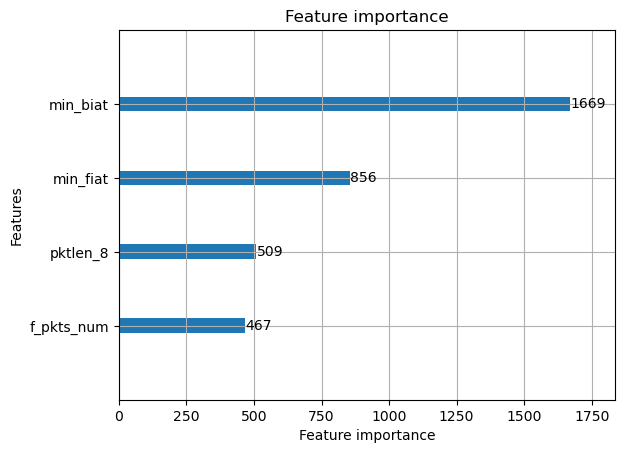


################################################################################
Confusion Matrix:


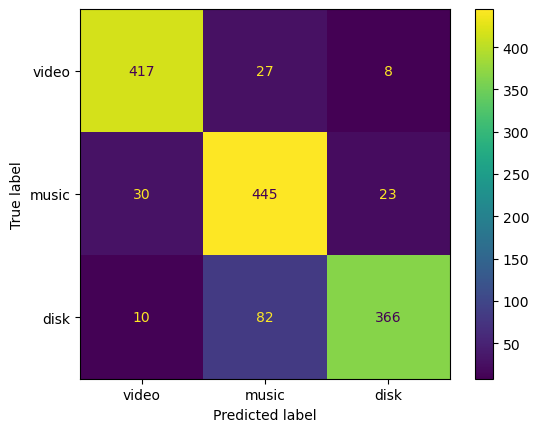


################################################################################
Classification Report:
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       452
           1       0.80      0.89      0.85       498
           2       0.92      0.80      0.86       458

    accuracy                           0.87      1408
   macro avg       0.88      0.87      0.87      1408
weighted avg       0.88      0.87      0.87      1408



In [36]:
feature_importances = np.zeros(X.shape[1])

print('Feature importances:')
lgb.plot_importance(grid_search.best_estimator_)
plt.show()

print('\n' + '#' * 80)
print('Confusion Matrix:')
    # functions.plot_confusion_matrix(valid_y, predictions_LGB.round(), "Analysis",
    #                                 index=["Std SSH", "Obf SSH"], columns=["Std SSH", "Obf SSH"])
    # metrics.confusion_matrix(model, valid_features, valid_y, cmap='Blues_r')
cm = confusion_matrix(y_test, predictions_LGB, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["video", "music", "disk"])
disp.plot() #cmap='Blues_r')
plt.show()
    
print('\n' + '#' * 80)
print('Classification Report:')
print(metrics.classification_report(y_test, grid_search.predict(X_test)))
plt.show()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

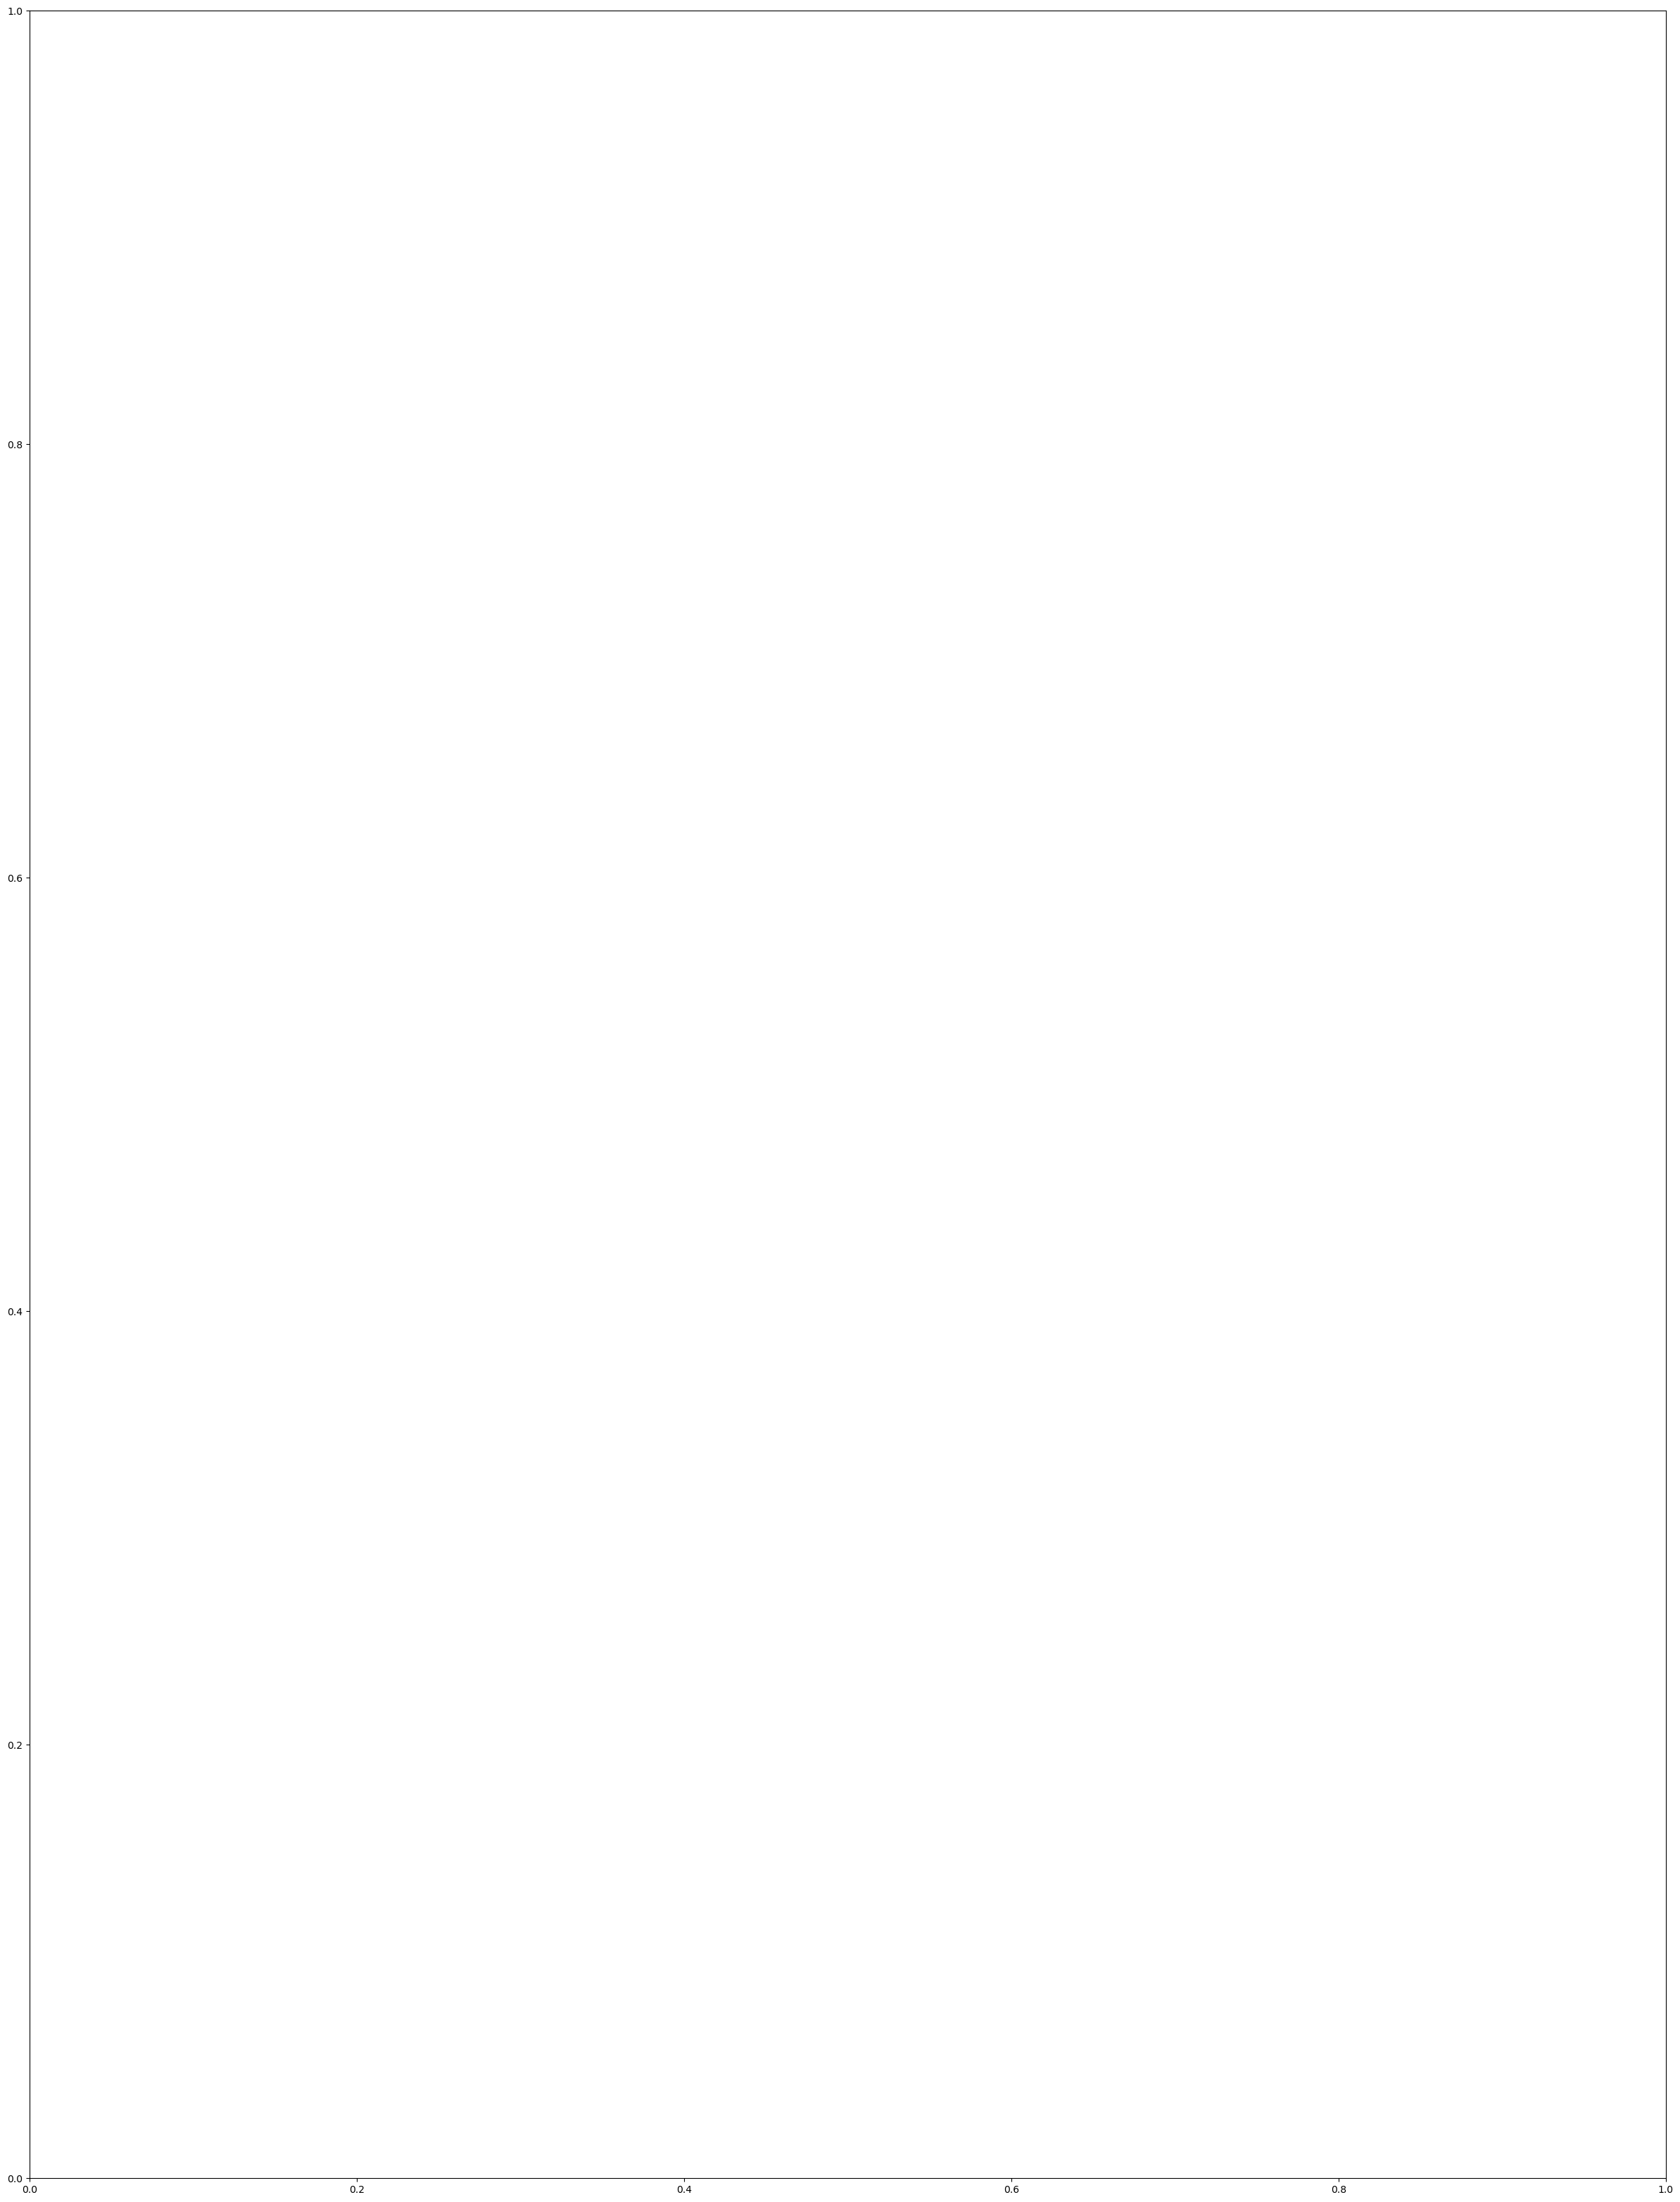

In [37]:
lgb.plot_tree(grid_search.best_estimator_, figsize=(30,40), show_info=['data_percentage',])

## Final test on X

In [38]:
predicted_X = grid_search.predict(X)
print('LGB accuracy:', accuracy_score(y, predicted_X))

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
LGB accuracy: 0.8926060089494993


## Save model

In [39]:
import joblib

joblib.dump(grid_search.best_estimator_, f'{current_path}/model_lightgbm_2.pkl')

PermissionError: [Errno 13] Permission denied: '/model_lightgbm_2.pkl'